In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import optuna


In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
test_data = pd.read_csv('test.csv')
print(test_data.shape)


(700000, 26)
(300000, 25)


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [4]:
test_data.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


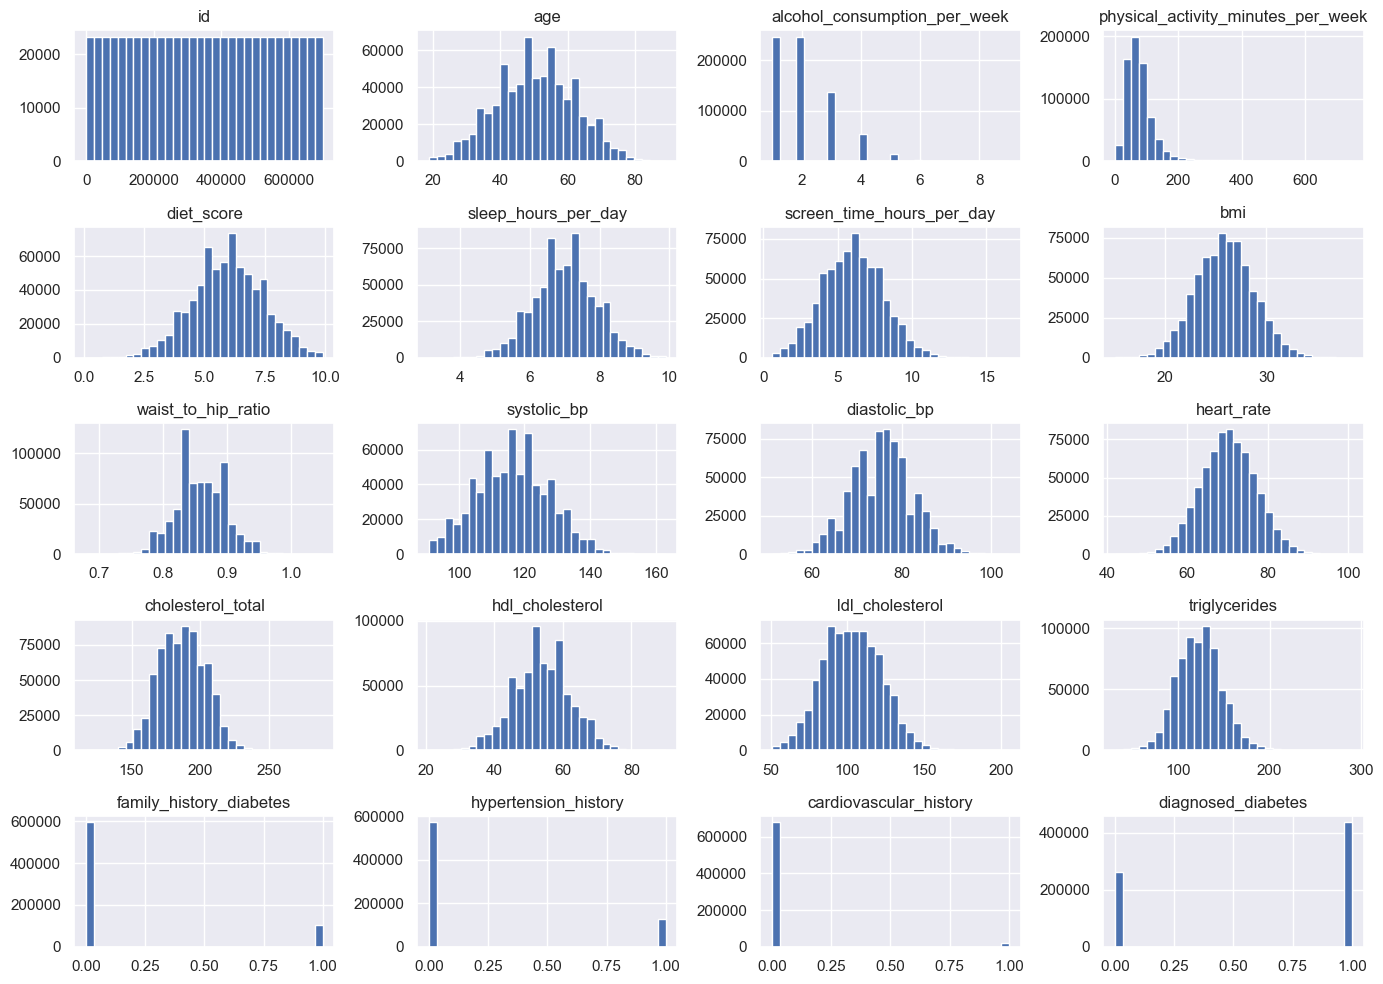

In [5]:
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
train_data.hist(bins=30, figsize=(14, 10))
plt.tight_layout()

In [6]:
seed = 52
metric = 'AUC'
n_folds = 3 # большой датасет


In [7]:
from sklearn.model_selection import train_test_split

y = train_data.diagnosed_diabetes
X = train_data.drop(columns=["diagnosed_diabetes"])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)

In [8]:
num_cat_cols = ['family_history_diabetes','hypertension_history','cardiovascular_history']
num_ord_cols = ['alcohol_consumption_per_week']
obj_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
obj_cols

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'smoking_status',
 'employment_status']

In [9]:
for col in obj_cols:
    print(f"{X_train[col].value_counts(dropna=False)}")
    print("=" * 40)

gender
Female    254327
Male      233126
Other       2547
Name: count, dtype: int64
ethnicity
White       269877
Hispanic     91065
Black        74490
Asian        42317
Other        12251
Name: count, dtype: int64
education_level
Highschool      240923
Graduate        183051
Postgraduate     55508
No formal        10518
Name: count, dtype: int64
income_level
Middle          203364
Lower-Middle    125179
Upper-Middle     89375
Low              60081
High             12001
Name: count, dtype: int64
smoking_status
Never      345891
Current     72522
Former      71587
Name: count, dtype: int64
employment_status
Employed      361399
Retired        80883
Unemployed     34901
Student        12817
Name: count, dtype: int64


In [10]:
obj_cat_cols = ['gender','ethnicity']
obj_ord_cols = ['education_level','income_level','smoking_status','employment_status']

cat_cols = obj_cat_cols + num_cat_cols
ord_cols = obj_ord_cols + num_ord_cols
print(cat_cols)
print(ord_cols)

['gender', 'ethnicity', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
['education_level', 'income_level', 'smoking_status', 'employment_status', 'alcohol_consumption_per_week']


In [11]:
for col in ord_cols:
    print(f"{X_train[col].value_counts(dropna=False)}")
    print("=" * 40)

education_level
Highschool      240923
Graduate        183051
Postgraduate     55508
No formal        10518
Name: count, dtype: int64
income_level
Middle          203364
Lower-Middle    125179
Upper-Middle     89375
Low              60081
High             12001
Name: count, dtype: int64
smoking_status
Never      345891
Current     72522
Former      71587
Name: count, dtype: int64
employment_status
Employed      361399
Retired        80883
Unemployed     34901
Student        12817
Name: count, dtype: int64
alcohol_consumption_per_week
2    172838
1    172369
3     96212
4     37042
5      9300
6      1891
7       315
8        32
9         1
Name: count, dtype: int64


In [12]:
for col in ord_cols:
    print(f"{X_valid[col].value_counts(dropna=False)}")
    print("=" * 40)

education_level
Highschool      103222
Graduate         78217
Postgraduate     24134
No formal         4427
Name: count, dtype: int64
income_level
Middle          87193
Lower-Middle    53391
Upper-Middle    38461
Low             25722
High             5233
Name: count, dtype: int64
smoking_status
Never      148557
Current     30841
Former      30602
Name: count, dtype: int64
employment_status
Employed      154771
Retired        34852
Unemployed     14886
Student         5491
Name: count, dtype: int64
alcohol_consumption_per_week
1    73942
2    73754
3    41353
4    15931
5     4022
6      837
7      132
8       27
9        2
Name: count, dtype: int64


In [13]:
print(f"{test_data.isna().sum()}")

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [14]:
for col in ord_cols:
    print(f"{test_data[col].value_counts(dropna=False)}")
    print("=" * 40)

education_level
Highschool      153355
Graduate        105440
Postgraduate     34118
No formal         7087
Name: count, dtype: int64
income_level
Middle          124249
Lower-Middle     76285
Upper-Middle     54624
Low              36816
High              8026
Name: count, dtype: int64
smoking_status
Never      211666
Former      44438
Current     43896
Name: count, dtype: int64
employment_status
Employed      217993
Retired        51207
Unemployed     21881
Student         8919
Name: count, dtype: int64
alcohol_consumption_per_week
1    104820
2    104723
3     59091
4     23407
5      6305
6      1401
7       215
8        37
9         1
Name: count, dtype: int64


In [15]:
print(train_data['diagnosed_diabetes'].value_counts(normalize=True))

diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


In [16]:
ordinal_mappings = {
    "education_level": [
        "Postgraduate",   # 0
        "Graduate",       # 1
        "Highschool",     # 2
        "No formal"       # 3 
    ],
    "income_level": [
        "High",           # 0  
        "Upper-Middle",   # 1
        "Middle",         # 2
        "Lower-Middle",   # 3
        "Low"             # 4 
    ],
    "smoking_status": [
        "Never",          # 0 
        "Former",         # 1 
        "Current"         # 2 
    ],
    "employment_status": [
        "Employed",       # 0 
        "Student",        # 1 
        "Retired",        # 2 
        "Unemployed"      # 3 
    ],
}
for col, levels in ordinal_mappings.items():
    if col in X_train.columns:
        mapping_dict = {level: i for i, level in enumerate(levels)}
        X_train[col] = X_train[col].map(mapping_dict)
for col, levels in ordinal_mappings.items():
    if col in X_valid.columns:
        mapping_dict = {level: i for i, level in enumerate(levels)}
        X_valid[col] = X_valid[col].map(mapping_dict)

for col, levels in ordinal_mappings.items():
    if col in test_data.columns:
        mapping_dict = {level: i for i, level in enumerate(levels)}
        test_data[col] = test_data[col].map(mapping_dict)

In [17]:
def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the 
    majority/all of the observations (constant/quasi-constant features)
    
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant
        
    Returns
    -------
    list of variables names
    """
    
    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() /float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')    
    return quasi_constant_feature

In [18]:
quasi_constant_feature = constant_feature_detect(data=X_train,threshold=0.95)
quasi_constant_feature      

1  variables are found to be almost constant


['cardiovascular_history']

In [34]:
X_train.sample(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
140195,140195,55,4,54,4.6,7.0,5.3,23.6,0.83,139,...,120,Female,Black,1,2,0,0,1,0,0
523453,523453,42,2,30,7.0,7.9,8.3,24.0,0.83,128,...,146,Female,White,0,1,2,0,0,0,0


In [35]:
X_valid.sample(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
498992,498992,60,2,117,4.7,8.0,5.0,32.9,0.89,123,...,106,Male,Black,1,0,0,2,0,0,0
520683,520683,37,3,79,6.4,5.3,6.6,28.2,0.90,131,...,131,Male,White,1,1,2,2,0,0,0


In [144]:
test_data.sample(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
150505,850505,39,4,97,7.0,7.3,7.2,26.6,0.85,116,...,116,Male,White,1,2,2,0,0,0,0
105141,805141,74,4,28,6.5,7.5,7.7,27.0,0.87,120,...,101,Male,White,2,2,0,0,0,0,0


In [51]:
from catboost import CatBoostClassifier, Pool

def modeltraining(X_train,y_train,X_test,y_test,params):
    ''' Function for training model and show results.
        X - full training dataset (pd.DataFrame)
        y - target  (pd.Series)
        cat_features - list of categorical features from dataset
        params - dict of parameters passed to the model
        metric - str with catboost name of metric
        seed - random_state
        '''
        
   
    train_dataset = Pool(data=X_train, label=y_train, cat_features= params['cat_features'])
    eval_dataset = Pool(data=X_test, label=y_test, cat_features= params['cat_features'])

    cbc = CatBoostClassifier(**params)
    cbc.fit(
            train_dataset,
            eval_set=eval_dataset,
            verbose=500,
            use_best_model=True,
            plot=True)

    print(f'Score on validation dataset: {cbc.best_score_["validation"]}')
    
    importances = pd.Series(cbc.feature_importances_, index=X_train.columns)
    
    importances_sorted = importances.sort_values(ascending=False)
    feature_names = importances_sorted.index
    sorted_vals = importances_sorted.values
    
    y_pos = np.arange(len(feature_names))
    
    plt.figure(figsize=(10, 8))
    plt.barh(y_pos, sorted_vals, align='center', alpha=0.8)
    
    for i, val in enumerate(sorted_vals):
        plt.text(
            val + max(sorted_vals) * 0.01,  # немного отступ от бара
            i,
            f'{val:.4f}',
            va='center',
            ha='left',
            fontsize=9
        )
    
    plt.yticks(y_pos, feature_names)
    plt.xlabel('Feature Importance (Gain)')
    plt.title('CatBoost Feature Importances')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    y_pred = cbc.predict(eval_dataset)
    errors_mask = (y_pred != y_test.values)
    X_errors = X_test.copy()
    X_true_pred = X_test.copy()
    X_errors['true_target'] = y_test.values
    X_true_pred['true_target'] = y_test.values
    X_errors = X_errors[errors_mask].copy()
    X_true_pred = X_true_pred[y_pred == y_test].copy()
    return cbc, X_errors, X_true_pred

In [55]:
params = {
    'eval_metric' : metric,
    'cat_features': cat_cols,
    'use_best_model': True,
    'early_stopping_rounds': 100,
    'random_seed': seed,
    'ignored_features': None,
    'verbose': False
    }

# Первый запуск (0.7244)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.146348
0:	test: 0.6732576	best: 0.6732576 (0)	total: 655ms	remaining: 10m 54s
500:	test: 0.7240135	best: 0.7240215 (499)	total: 7m 13s	remaining: 7m 12s
999:	test: 0.7243638	best: 0.7244603 (836)	total: 14m 6s	remaining: 0us

bestTest = 0.7244602996
bestIteration = 836

Shrink model to first 837 iterations.
Score on validation dataset: {'Logloss': 0.584448873060458, 'AUC': 0.7244602996180687}


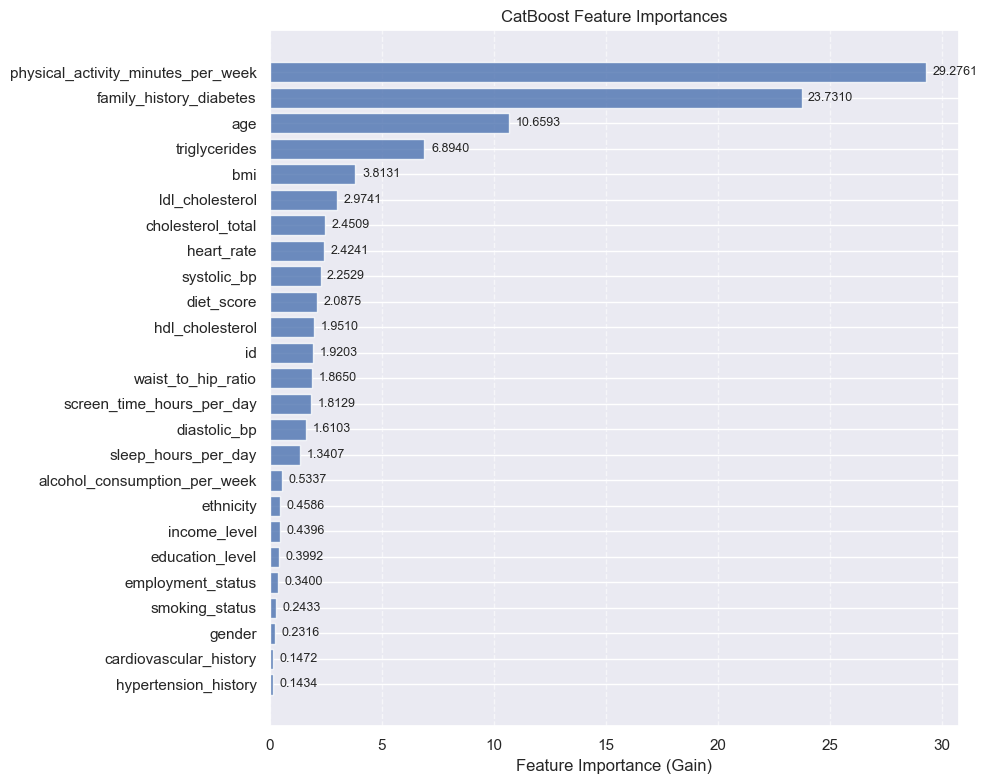

C:\Users\Sasha\AppData\Local\Temp\ipykernel_14332\2934166200.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_errors['true_target'] = y_test[y_pred == y_test]
C:\Users\Sasha\AppData\Local\Temp\ipykernel_14332\2934166200.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_true_pred['true_target'] = y_test[y_pred == y_test]


In [42]:
_ = modeltraining(X_train,y_train,X_valid,y_valid, cat_cols,params,metric,seed)

# Изменения 1 (0.7247)

In [56]:
params1 = params.copy()
params1['ignored_features'] = ['id','cardiovascular_history']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.146348
0:	test: 0.6718165	best: 0.6718165 (0)	total: 765ms	remaining: 12m 43s
500:	test: 0.7241599	best: 0.7241600 (499)	total: 5m 54s	remaining: 5m 53s
999:	test: 0.7246359	best: 0.7247185 (889)	total: 12m 33s	remaining: 0us

bestTest = 0.7247185066
bestIteration = 889

Shrink model to first 890 iterations.
Score on validation dataset: {'Logloss': 0.5844024932264369, 'AUC': 0.724718506570417}


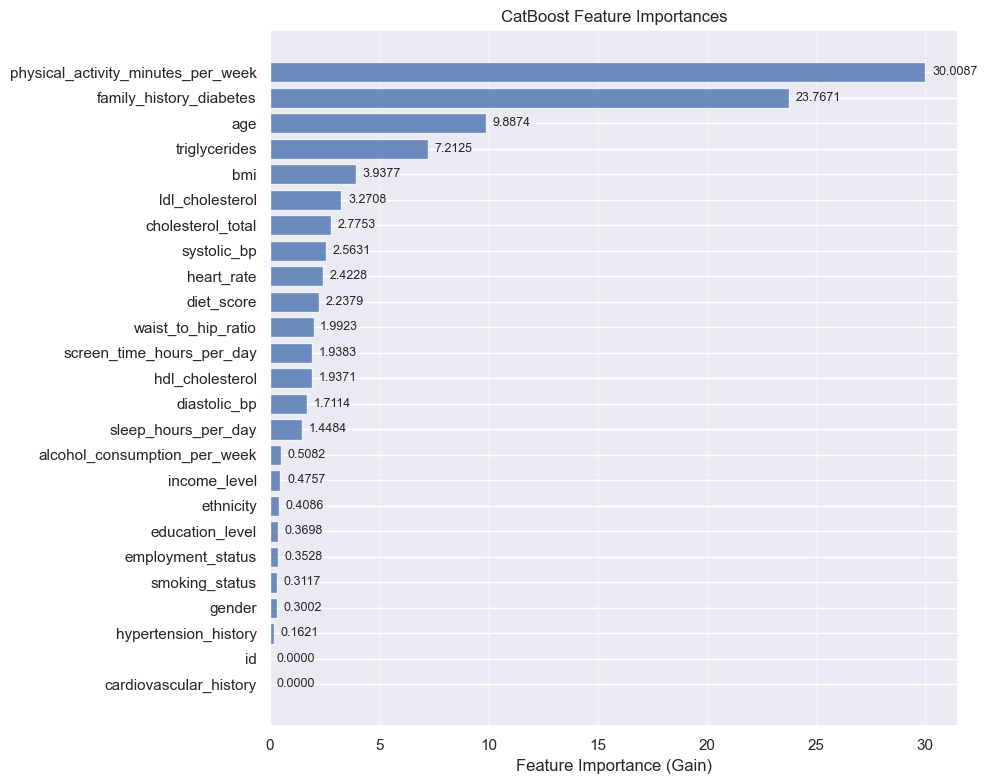

C:\Users\Sasha\AppData\Local\Temp\ipykernel_14332\2934166200.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_errors['true_target'] = y_test[y_pred == y_test]
C:\Users\Sasha\AppData\Local\Temp\ipykernel_14332\2934166200.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_true_pred['true_target'] = y_test[y_pred == y_test]


In [60]:
model, X_errors, X_true = modeltraining(X_train,y_train,X_valid,y_valid,cat_cols,params1,metric,seed)

# Изменения 2 (0.7248)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.146348
0:	test: 0.6740834	best: 0.6740834 (0)	total: 836ms	remaining: 13m 55s
500:	test: 0.7242140	best: 0.7242140 (500)	total: 5m 7s	remaining: 5m 6s
999:	test: 0.7246916	best: 0.7247951 (947)	total: 9m 43s	remaining: 0us

bestTest = 0.7247950796
bestIteration = 947

Shrink model to first 948 iterations.
Score on validation dataset: {'Logloss': 0.5843876425108961, 'AUC': 0.7247950796284177}


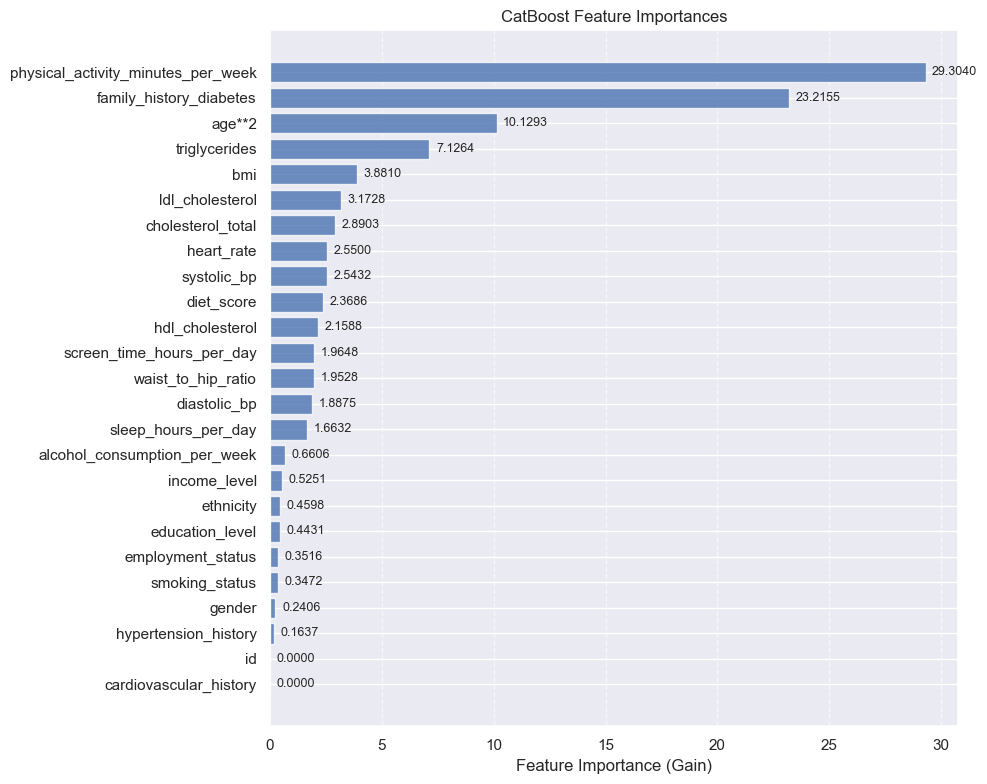

In [83]:
X_train1 = X_train.copy()
X_valid1 = X_valid.copy()

X_train1['age**2'] = X_train1.age ** 2
X_valid1['age**2'] = X_valid1.age ** 2

X_train1.drop(['age'],axis = 1,inplace= True)
X_valid1.drop(['age'],axis = 1,inplace= True)

model, X_errors, X_true = modeltraining(X_train1,y_train,X_valid1,y_valid,cat_cols,params1,metric,seed)

In [23]:
def plot_error_rate_per_bin(df_errors, df_correct, drop_cols=None):
    """
    Визуализация доли ошибок в каждом бине признака.
    Расчёт: (число ошибок в бине) / (число всех объектов в бине)
    """
    errors = df_errors.copy()
    correct = df_correct.copy()

    # Удаляем служебные колонки
    default_drop = {'id', 'true_label', 'pred_label', 'error_type', 'confidence', 'index'}
    if drop_cols:
        default_drop.update(drop_cols)
    
    for col in default_drop:
        errors = errors.drop(columns=[col], errors='ignore')
        correct = correct.drop(columns=[col], errors='ignore')
    
    # Числовые признаки
    num_cols = errors.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) > 25:
        stds = errors[num_cols].std().sort_values(ascending=False)
        cols_to_plot = stds.head(25).index.tolist()
    else:
        cols_to_plot = num_cols

    
    n = len(cols_to_plot)
    if n == 0:
        return

    ncols_fig = 5
    nrows_fig = 2 * (n + ncols_fig - 1) // ncols_fig

    fig, axes = plt.subplots(
        nrows=nrows_fig,
        ncols=ncols_fig,
        figsize=(4 * ncols_fig, 2.5 * nrows_fig)
    )

    if nrows_fig == 1 and ncols_fig == 1:
        axes = np.array([[axes]])
    elif nrows_fig == 1:
        axes = np.array([axes])
    elif ncols_fig == 1:
        axes = np.array([[ax] for ax in axes])
    else:
        axes = np.array(axes)

    fig.suptitle('Доля ошибок в бинах признаков', fontsize=14)

    # Объединяем данные для определения общих бинов
    combined = pd.concat([errors, correct], ignore_index=True)

    for idx, col in enumerate(cols_to_plot):
        row_cell = idx // ncols_fig
        col_cell = idx % ncols_fig
        # ax = axes[row, col_idx] if nrows_fig > 1 or ncols_fig > 1 else axes[0, 0]

        ax_top = axes[2 * row_cell][col_cell]
                # Нижний subplot — верные
        ax_bottom = axes[2 * row_cell + 1][col_cell]
        

        # Определяем бины по объединённым данным
        bins = np.histogram_bin_edges(combined[col].dropna(), bins=30)
        
        # Гистограммы для всех, ошибок и верных
        hist_all, _ = np.histogram(combined[col].dropna(), bins=bins)
        hist_err, _ = np.histogram(errors[col].dropna(), bins=bins) if len(errors) > 0 else (np.zeros(len(bins)-1), None)
        hist_corr, _ = np.histogram(correct[col].dropna(), bins=bins) if len(correct) > 0 else (np.zeros(len(bins)-1), None)

        # Безопасное деление: избегаем деления на ноль
        error_rate = np.divide(hist_err, hist_all, out=np.zeros_like(hist_err, dtype=float), where= hist_all!=0)

        # Центры бинов для отрисовки
        bin_centers = (bins[:-1] + bins[1:]) / 2

        if col in combined.columns:
            vals_err = combined[col].dropna()
            ax_top.hist(vals_err, bins=30, color='skyblue', alpha=0.7, edgecolor='k', linewidth=0.3)
            ax_top.set_title(f'Распределение {col}', fontsize=10)
            ax_top.grid(True, alpha=0.3)
        

        # Столбчатая диаграмма доли ошибок
        if col in correct.columns:
            ax_bottom.bar(
                bin_centers,
                error_rate,
                width=(bins[1] - bins[0]) * 0.8,
                color='salmon',
                alpha=0.7,
                edgecolor='k',
                linewidth=0.3
            )
            ax_bottom.set_title(f'Процент ошибок {col}', fontsize=10)
            ax_bottom.grid(True, alpha=0.3)
        

    # Формат оси Y в процентах
    for i in range(1, axes.shape[0], 2):
        for j in range(axes.shape[1]):
            if axes[i, j].has_data():
                axes[i, j].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    all_numeric = errors.select_dtypes(include=[np.number]).columns.tolist()
    shown = cols_to_plot
    skipped = [col for col in all_numeric if col not in shown]
        
    if skipped:
        print(f"Всего числовых колонок: {len(all_numeric)}")
        print(f"Пропущено ({len(skipped)}): {skipped}")
    else:
        print("Все числовые колонки отображены.")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # ===================================Категориальные=================================
    cat_cols = errors.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    
    # Лимит на количество колонок
    if len(cat_cols) > 25:
        # Сортируем по количеству уникальных значений (чем меньше, тем информативнее визуально)
        nunique = errors[cat_cols].nunique().sort_values()
        cols_to_plot = nunique.head(25).index.tolist()
    else:
        cols_to_plot = cat_cols

    n = len(cols_to_plot)
    if n == 0:
        print("Категориальные колонки не найдены.")
        return

    ncols_fig = 5 if n > 5 else 2
    nrows_fig = 2 * ((n + ncols_fig - 1) // ncols_fig)

    fig, axes = plt.subplots(
        nrows=nrows_fig,
        ncols=ncols_fig,
        figsize=(4 * ncols_fig, 4 * nrows_fig) # Увеличил высоту для подписей категорий
    )

    # Приведение axes к 2D массиву для удобства индексации
    if nrows_fig == 1: axes = axes[np.newaxis, :]
    if ncols_fig == 1: axes = axes[:, np.newaxis]

    fig.suptitle('Распределение категорий и доля ошибок', fontsize=16, y=0.98)


    combined = pd.concat([errors, correct], ignore_index=True)

    for idx, col in enumerate(cols_to_plot):
        row_cell = idx // ncols_fig
        col_cell = idx % ncols_fig
        
        ax_top = axes[2 * row_cell][col_cell]
        ax_bottom = axes[2 * row_cell + 1][col_cell]

        # Считаем общее распределение (топ 10 категорий для читаемости)
        total_counts = combined[col].value_counts(dropna=True).head(10)
        categories = total_counts.index.tolist()
        
        # Данные для графиков
        err_counts = errors[col].value_counts().reindex(categories, fill_value=0)
        all_counts = combined[col].value_counts().reindex(categories, fill_value=0)
        
        # Доля ошибок
        error_rate = (err_counts / all_counts).fillna(0)

        # 1. Верхний график: Распределение объектов (Count Plot)
        ax_top.bar(categories, all_counts, color='skyblue', alpha=0.7, edgecolor='k', linewidth=0.3)
        ax_top.set_title(f'Распределение {col}', fontsize=10)
        ax_top.tick_params(axis='x', rotation=45)
        ax_top.grid(True, axis='y', alpha=0.3)

        # 2. Нижний график: Процент ошибок (Error Rate)
        ax_bottom.bar(categories, error_rate, color='salmon', alpha=0.7, edgecolor='k', linewidth=0.3)
        ax_bottom.set_title(f'Доля ошибок в {col}', fontsize=10)
        ax_bottom.tick_params(axis='x', rotation=45)
        ax_bottom.grid(True, axis='y', alpha=0.3)
        ax_bottom.set_ylim(0, 1.1)

    # Форматирование оси Y для нижних графиков (проценты)
    for i in range(1, nrows_fig, 2):
        for j in range(ncols_fig):
            axes[i, j].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    # Очистка пустых сабплотов, если n не кратно ncols_fig
    for i in range(n, (nrows_fig // 2) * ncols_fig):
        r = i // ncols_fig
        c = i % ncols_fig
        fig.delaxes(axes[2*r][c])
        fig.delaxes(axes[2*r+1][c])

    print(f"Всего категориальных колонок: {len(cat_cols)}")
    print(f"Показано: {len(cols_to_plot)}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# plot_error_rate_per_bin(
#    df_errors=X_errors,
#    df_correct=X_true,
#    drop_cols= params1['ignored_features'] + ['true_target']  # добавь, что хочешь убрать
#)

# Изменения 3(0.7008)

In [176]:
X_train3 = X_train.copy()
X_valid3 = X_valid.copy()

def changes_3(data):
    data = data.copy()
    # gender fix
    data['gender'] = data['gender'].replace({'Other': 'Female'})
    
    # physical_activity
    data['physical_activity_minutes_per_week'] = pd.cut(
        data['physical_activity_minutes_per_week'],
        bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, np.inf],
        labels=['0-20','20-40','40-60','60-80','80-100','100-120',
                '120-140','140-160','160-180','180-200','>200'],  # 11 лейблов ← 12 границ
        right=True,
        include_lowest=True
    ).astype('category')
    
    # alcohol
    data['alcohol_consumption_per_week'] = pd.cut(
        data['alcohol_consumption_per_week'],
        bins=[0, 1.5, 2.5, 3.5, 4.5, np.inf],
        labels=['1','2','3','4','>4'],  # 5 ← 6
        right=True,
        include_lowest=True
    ).astype('category')
    
    # sleep
    data['sleep_hours_per_day'] = pd.cut(
        data['sleep_hours_per_day'],
        bins=[0, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, np.inf],
        labels=['<5','5-5.5','5.5-6','6-6.5','6.5-7','7-7.5',
                '7.5-8','8-8.5','8.5-9','9-9.5','9.5-10','>10'],  # 12 ← 13
        right=True,
        include_lowest=True
    ).astype('category')
    
    # screen_time
    data['screen_time_hours_per_day'] = pd.cut(
        data['screen_time_hours_per_day'],
        bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, np.inf],
        labels=['<1','1-2','2-3','3-4','4-5','5-6',
                '6-7','7-8','8-9','9-10','10-11','>11'],  # 12 ← 13
        right=True,
        include_lowest=True
    ).astype('category')
    
    # bmi — 21 граница → 20 лейблов
    data['bmi'] = pd.cut(
        data['bmi'],
        bins=[15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,np.inf],
        labels=['<16','16-17','17-18','18-19','19-20','20-21','21-22','22-23',
                '23-24','24-25','25-26','26-27','27-28','28-29','29-30','30-31',
                '31-32','32-33','33-34','34-35','>35'],  # 21 лейбл ← 22 границы
        right=True,
        include_lowest=True
    ).astype('category')
    
    # heart_rate — ИСПРАВЛЕНО: 23 границы → 22 лейбла
    data['heart_rate'] = pd.cut(
        data['heart_rate'],
        bins=[0, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
              75, 76, 77, 78, 79, 80, np.inf],  # 23 границы
        labels=['<60', '60-61', '61-62', '62-63', '63-64', '64-65', '65-66',
                '66-67', '67-68', '68-69', '69-70', '70-71', '71-72', '72-73',
                '73-74', '74-75', '75-76', '76-77', '77-78', '78-79', '79-80', '>80'],  # 22 лейбла
        right=True,
        include_lowest=True
    ).astype('category')
    
    # waist_to_hip_ratio — 29 границ → 28 лейблов
    data['waist_to_hip_ratio'] = pd.cut(
        data['waist_to_hip_ratio'],
        bins=[0,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,
              0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.05,1.1],  # 29
        labels=['<0.75'] + [f'{a:.2f}-{b:.2f}' for a,b in zip(
            [0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,
             0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.05],
            [0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,
             0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0,1.05,1.1]
        )],  # 28 лейблов
        right=True,
        include_lowest=True
    ).astype('category')
    
    return data

X_train3 = changes_3(X_train3)
X_valid3 = changes_3(X_valid3)

In [185]:
cat_cols3 = cat_cols.copy()
cat_cols3 = cat_cols3 + ['physical_activity_minutes_per_week','alcohol_consumption_per_week','sleep_hours_per_day','screen_time_hours_per_day','bmi','heart_rate','waist_to_hip_ratio']
params3 = params1.copy()
params3['cat_features'] = cat_cols3

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.146348
0:	test: 0.6748014	best: 0.6748014 (0)	total: 2.76s	remaining: 45m 56s
500:	test: 0.7007607	best: 0.7007607 (500)	total: 14m	remaining: 13m 56s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7008521065
bestIteration = 610

Shrink model to first 611 iterations.
Score on validation dataset: {'Logloss': 0.5987986311750598, 'AUC': 0.7008521064728827}


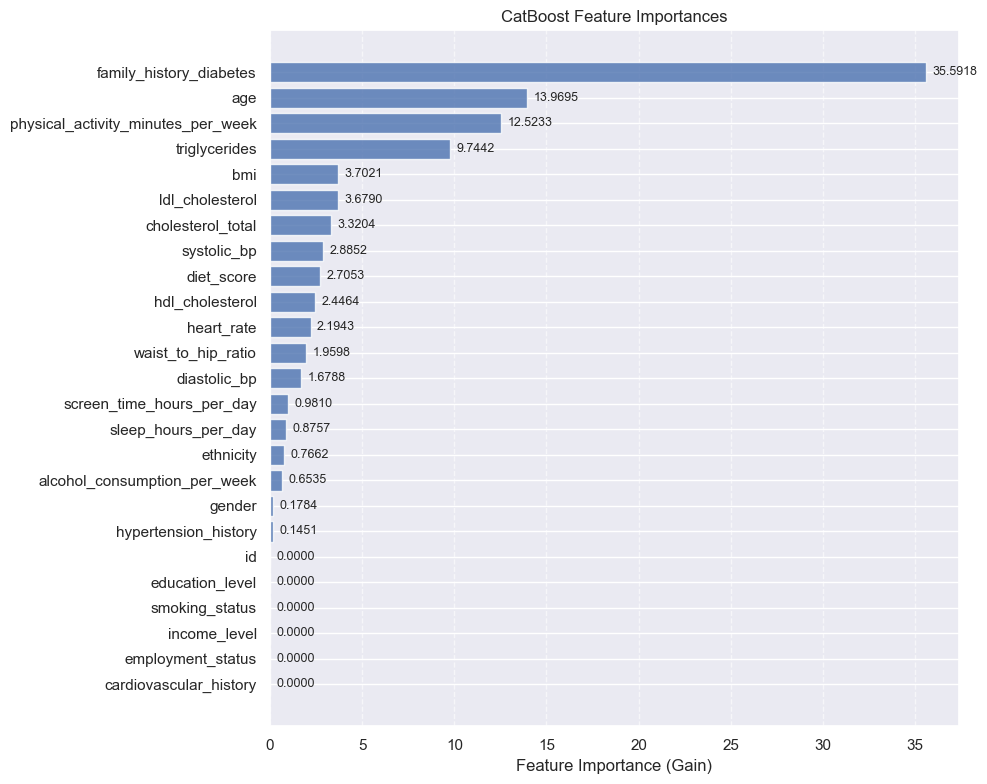

In [186]:
model, X_errors, X_true = modeltraining(X_train3,y_train,X_valid3,y_valid,cat_cols3,params3,metric,seed)

# Изменения 4(0.720496738)

In [24]:
X_train44 = X_train.copy()
X_valid4 = X_valid.copy()

y_train44 = y_train.copy()
y_valid4 = y_valid.copy()

data4 = pd.concat([X_train44, y_train44], axis=1)
print(X_train44.shape,data4.shape)    

(490000, 25) (490000, 26)


In [25]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490000 entries, 568139 to 482293
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  490000 non-null  int64  
 1   age                                 490000 non-null  int64  
 2   alcohol_consumption_per_week        490000 non-null  int64  
 3   physical_activity_minutes_per_week  490000 non-null  int64  
 4   diet_score                          490000 non-null  float64
 5   sleep_hours_per_day                 490000 non-null  float64
 6   screen_time_hours_per_day           490000 non-null  float64
 7   bmi                                 490000 non-null  float64
 8   waist_to_hip_ratio                  490000 non-null  float64
 9   systolic_bp                         490000 non-null  int64  
 10  diastolic_bp                        490000 non-null  int64  
 11  heart_rate                

In [26]:
print(data4.shape)
data4 = data4[data4['gender'] != 'Other']
data4 = data4[data4['physical_activity_minutes_per_week'] <250]
data4 = data4[data4['alcohol_consumption_per_week'] < 5]
data4 = data4[data4['sleep_hours_per_day'] > 4]
data4 = data4[data4['screen_time_hours_per_day'] < 12]
data4 = data4[(data4['bmi'] < 36) | (data4['bmi'] > 17)]
data4 = data4[(data4['heart_rate'] < 95) | (data4['heart_rate'] > 55)]
data4 = data4[(data4['waist_to_hip_ratio'] > 0.75) | (data4['waist_to_hip_ratio'] < 1)]
data4 = data4[data4['cholesterol_total'] > 145]
data4 = data4[data4['triglycerides'] < 220]
print(data4.shape)

(490000, 26)
(464312, 26)


In [ ]:
y_train4 = data4.diagnosed_diabetes
X_train4 = data4.drop('diagnosed_diabetes',axis = 1)

In [57]:
params4 = params1.copy()
params4['ignored_features'] = [
    'alcohol_consumption_per_week',
    'income_level',
    'ethnicity',
    'education_level',
    'employment_status',
    'smoking_status',
    'gender',
    'hypertension_history',
    'id',
    'cardiovascular_history'
]

In [53]:
X_train4['very_high_screen_time'] = (X_train4['screen_time_hours_per_day'] > 11).astype(int)
X_train4['very_high_phys_act'] = (X_train4['physical_activity_minutes_per_week'] > 200).astype(int)


X_valid4['very_high_screen_time'] = (X_valid4['screen_time_hours_per_day'] > 11).astype(int)
X_valid4['very_high_phys_act'] = (X_valid4['physical_activity_minutes_per_week'] > 200).astype(int)
cat_cols4 = cat_cols.copy() + ['very_high_screen_time','very_high_phys_act']
params4['cat_features'] = cat_cols4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.144415
0:	test: 0.6719764	best: 0.6719764 (0)	total: 1.27s	remaining: 21m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7203930368
bestIteration = 336

Shrink model to first 337 iterations.
Score on validation dataset: {'Logloss': 0.5876650581200045, 'AUC': 0.7203930367842248}


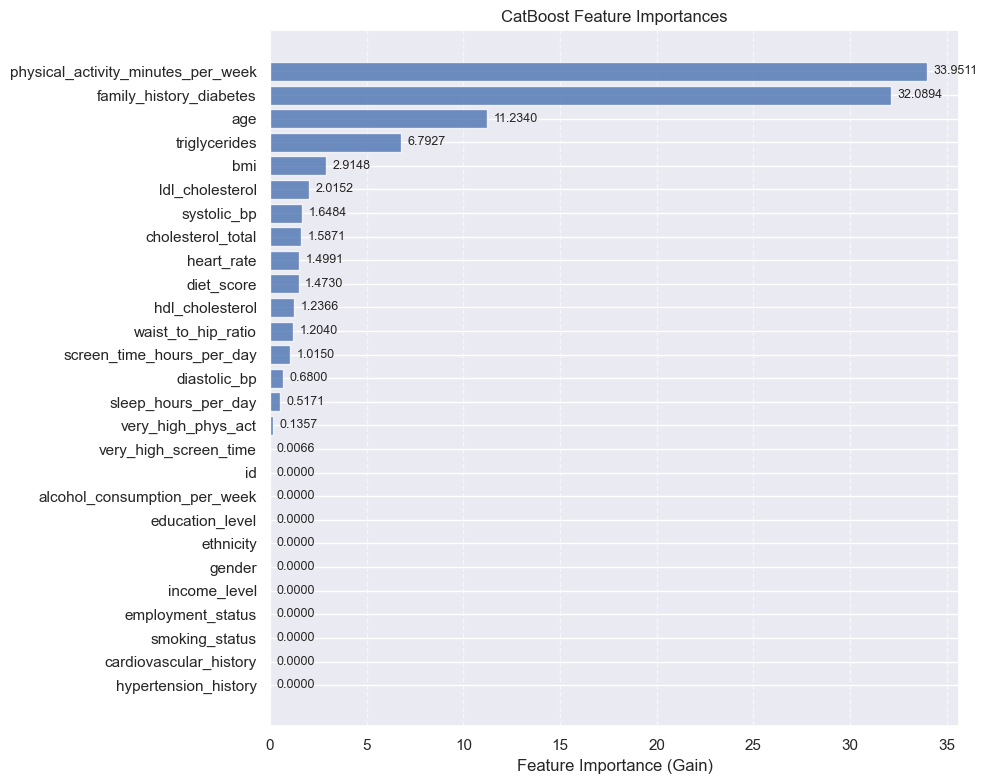

In [58]:
model4, X_errors4, X_true4 = modeltraining(X_train4,y_train4,X_valid4,y_valid4,params4)

Все числовые колонки отображены.


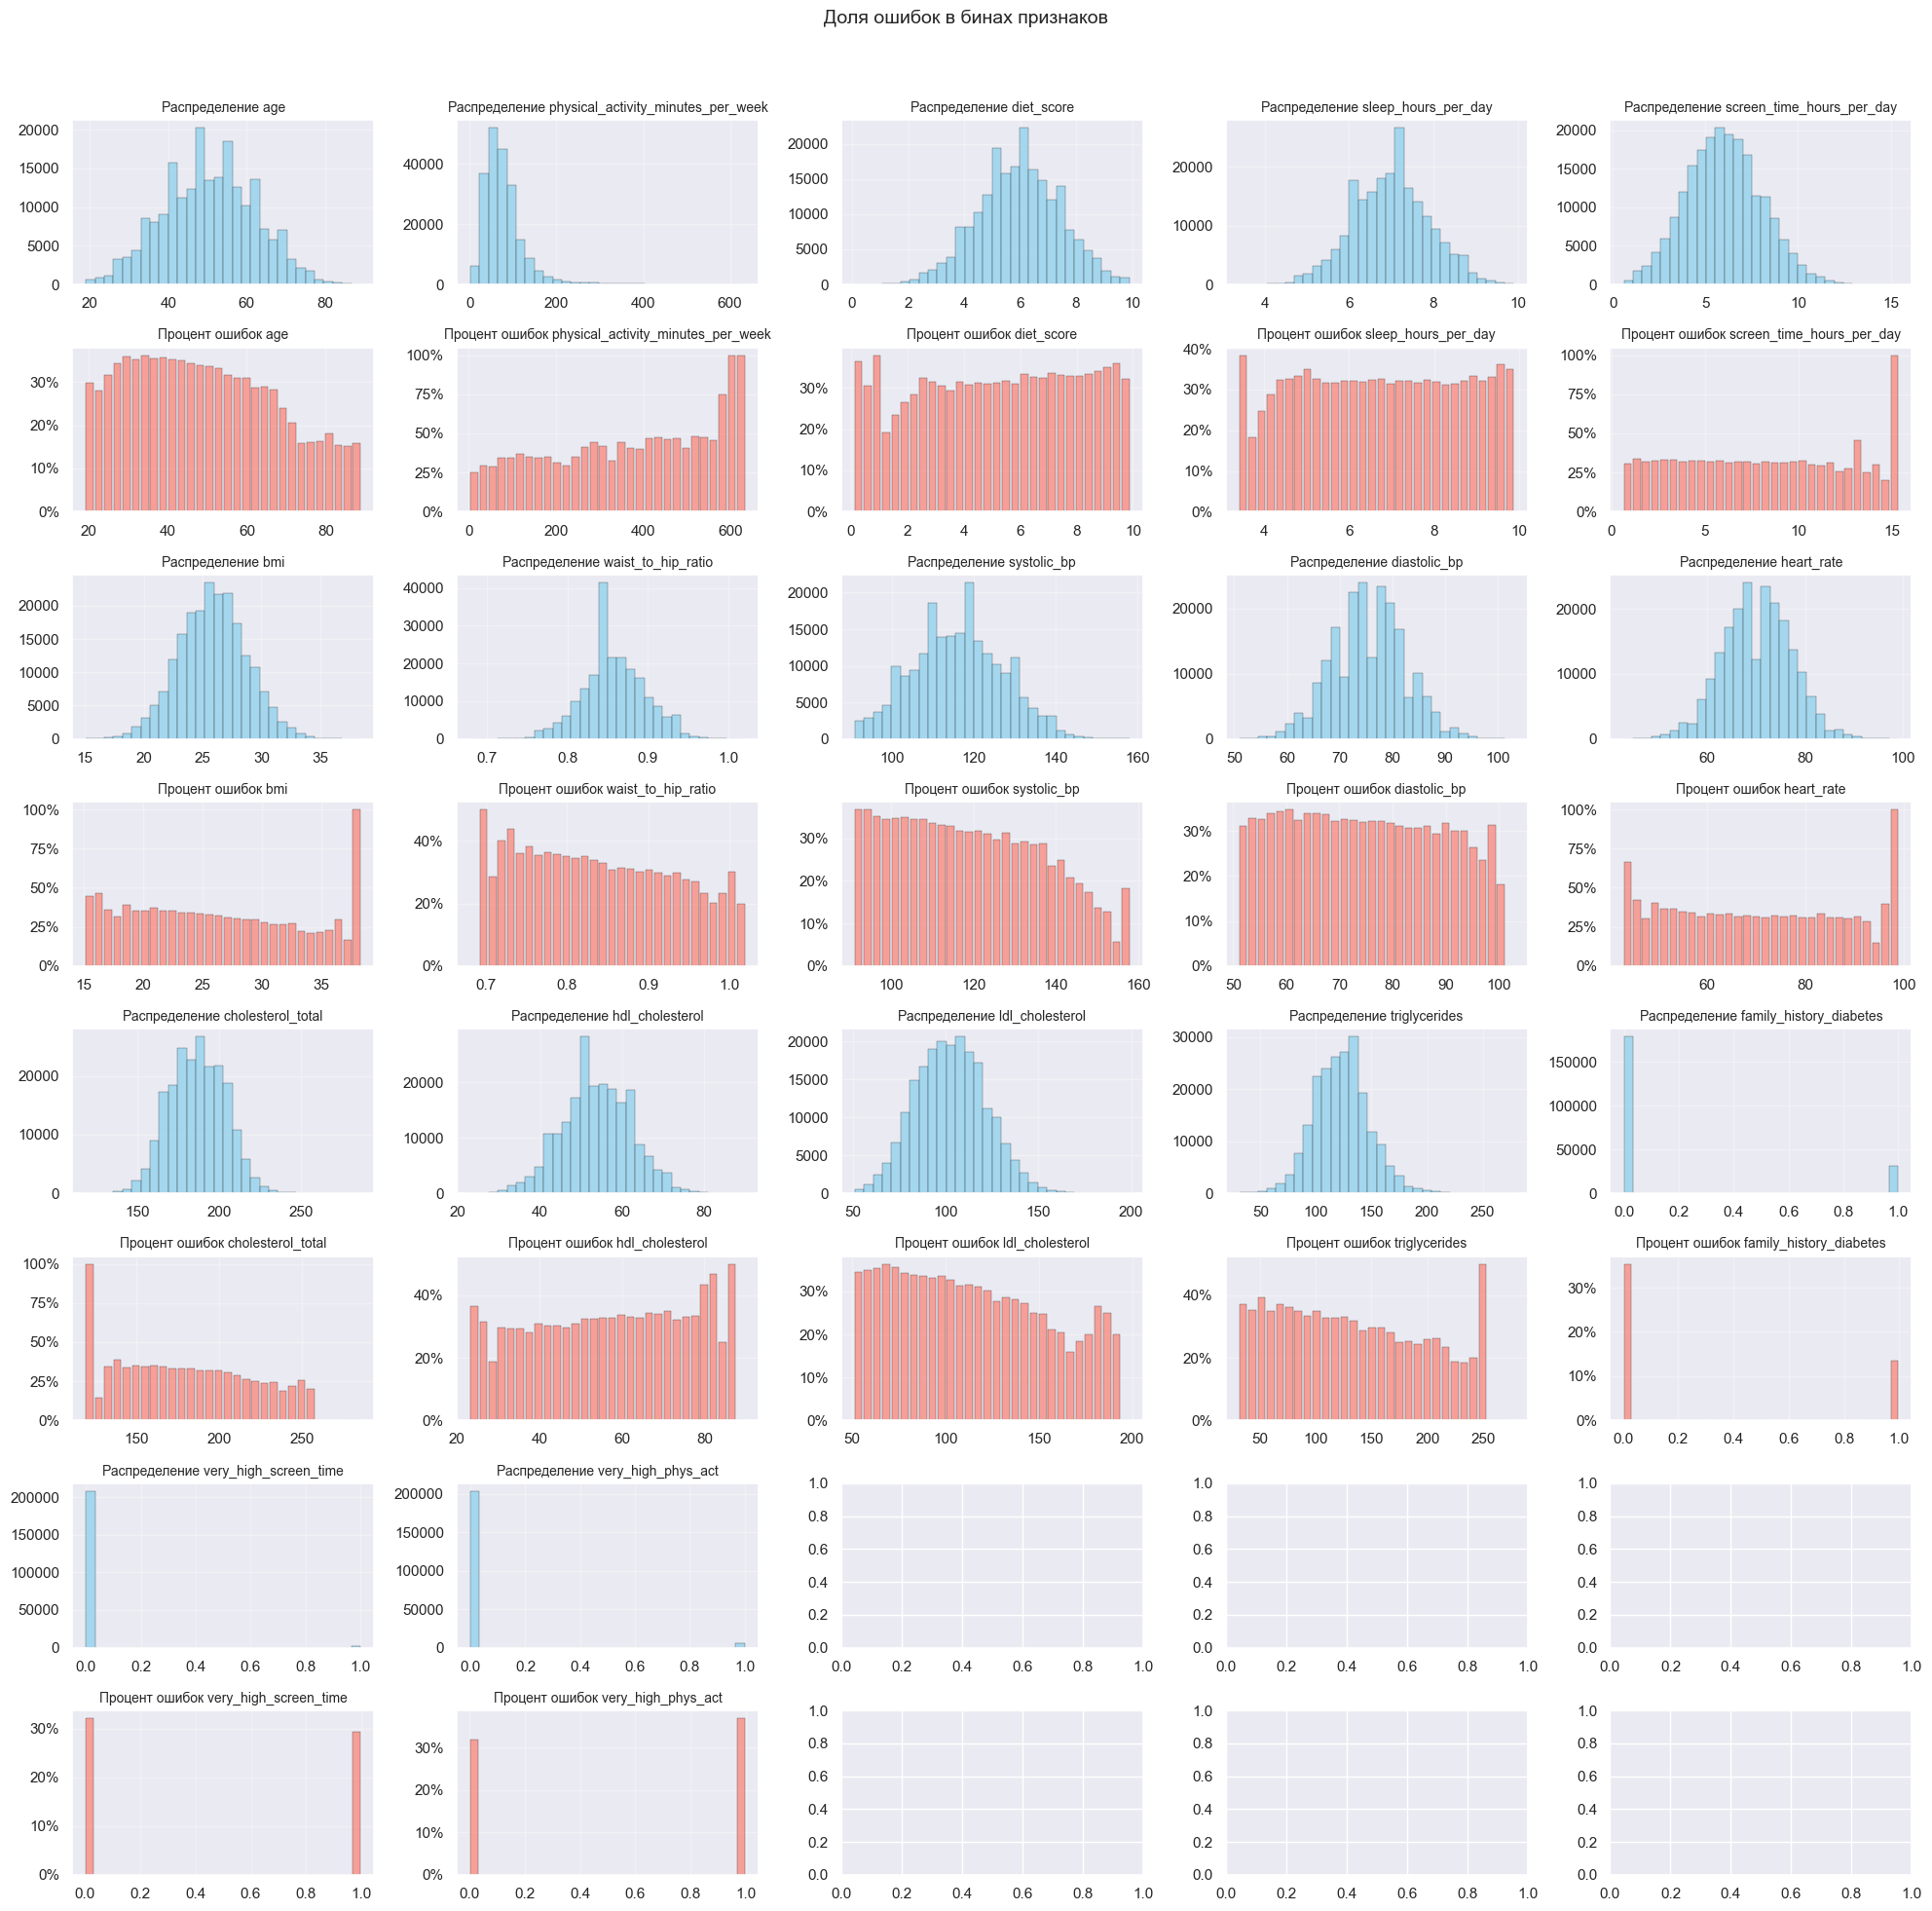

Категориальные колонки не найдены.


In [59]:
plot_error_rate_per_bin(
    df_errors=X_errors4,
    df_correct=X_true4,
    drop_cols= params4['ignored_features'] + ['true_target']  # добавь, что хочешь убрать
)


# Изменения 5 ()

In [61]:
X_train5 = X_train.copy()
X_valid5 = X_valid.copy()

y_train5 = y_train.copy()
y_valid5 = y_valid.copy()

In [74]:
type(params5)

list

In [75]:
X_train5['log_phys_act'] = np.log1p(X_train5['physical_activity_minutes_per_week'])
X_valid5['log_phys_act'] = np.log1p(X_valid5['physical_activity_minutes_per_week'])

X_train5['age**2'] = X_train5['age'] ** 2
X_valid5['age**2'] = X_valid5['age'] ** 2

params5 = params4.copy()
params5['ignored_features'] = params5['ignored_features'] + ['age','physical_activity_minutes_per_week']

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.146348
0:	test: 0.6749949	best: 0.6749949 (0)	total: 267ms	remaining: 4m 27s
500:	test: 0.7241538	best: 0.7241667 (485)	total: 2m 7s	remaining: 2m 7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7250789085
bestIteration = 892

Shrink model to first 893 iterations.
Score on validation dataset: {'Logloss': 0.584095519471095, 'AUC': 0.7250789085492079}


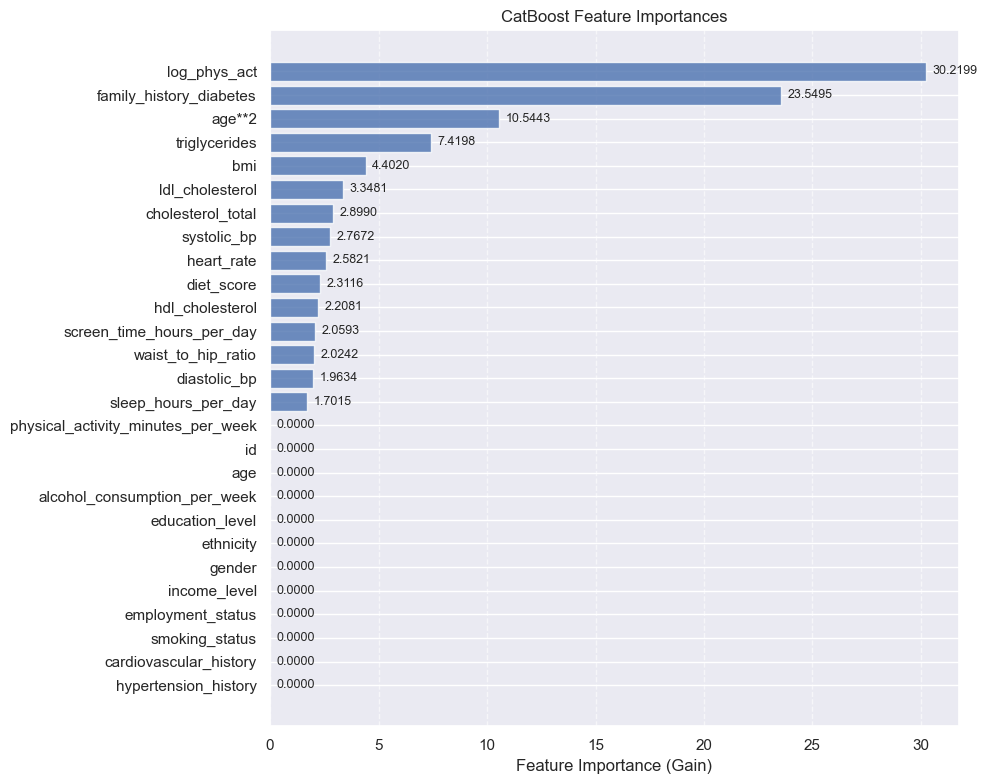

In [76]:
model5, X_errors5, X_true5 = modeltraining(X_train5,y_train5,X_valid5,y_valid5,params5)

Все числовые колонки отображены.


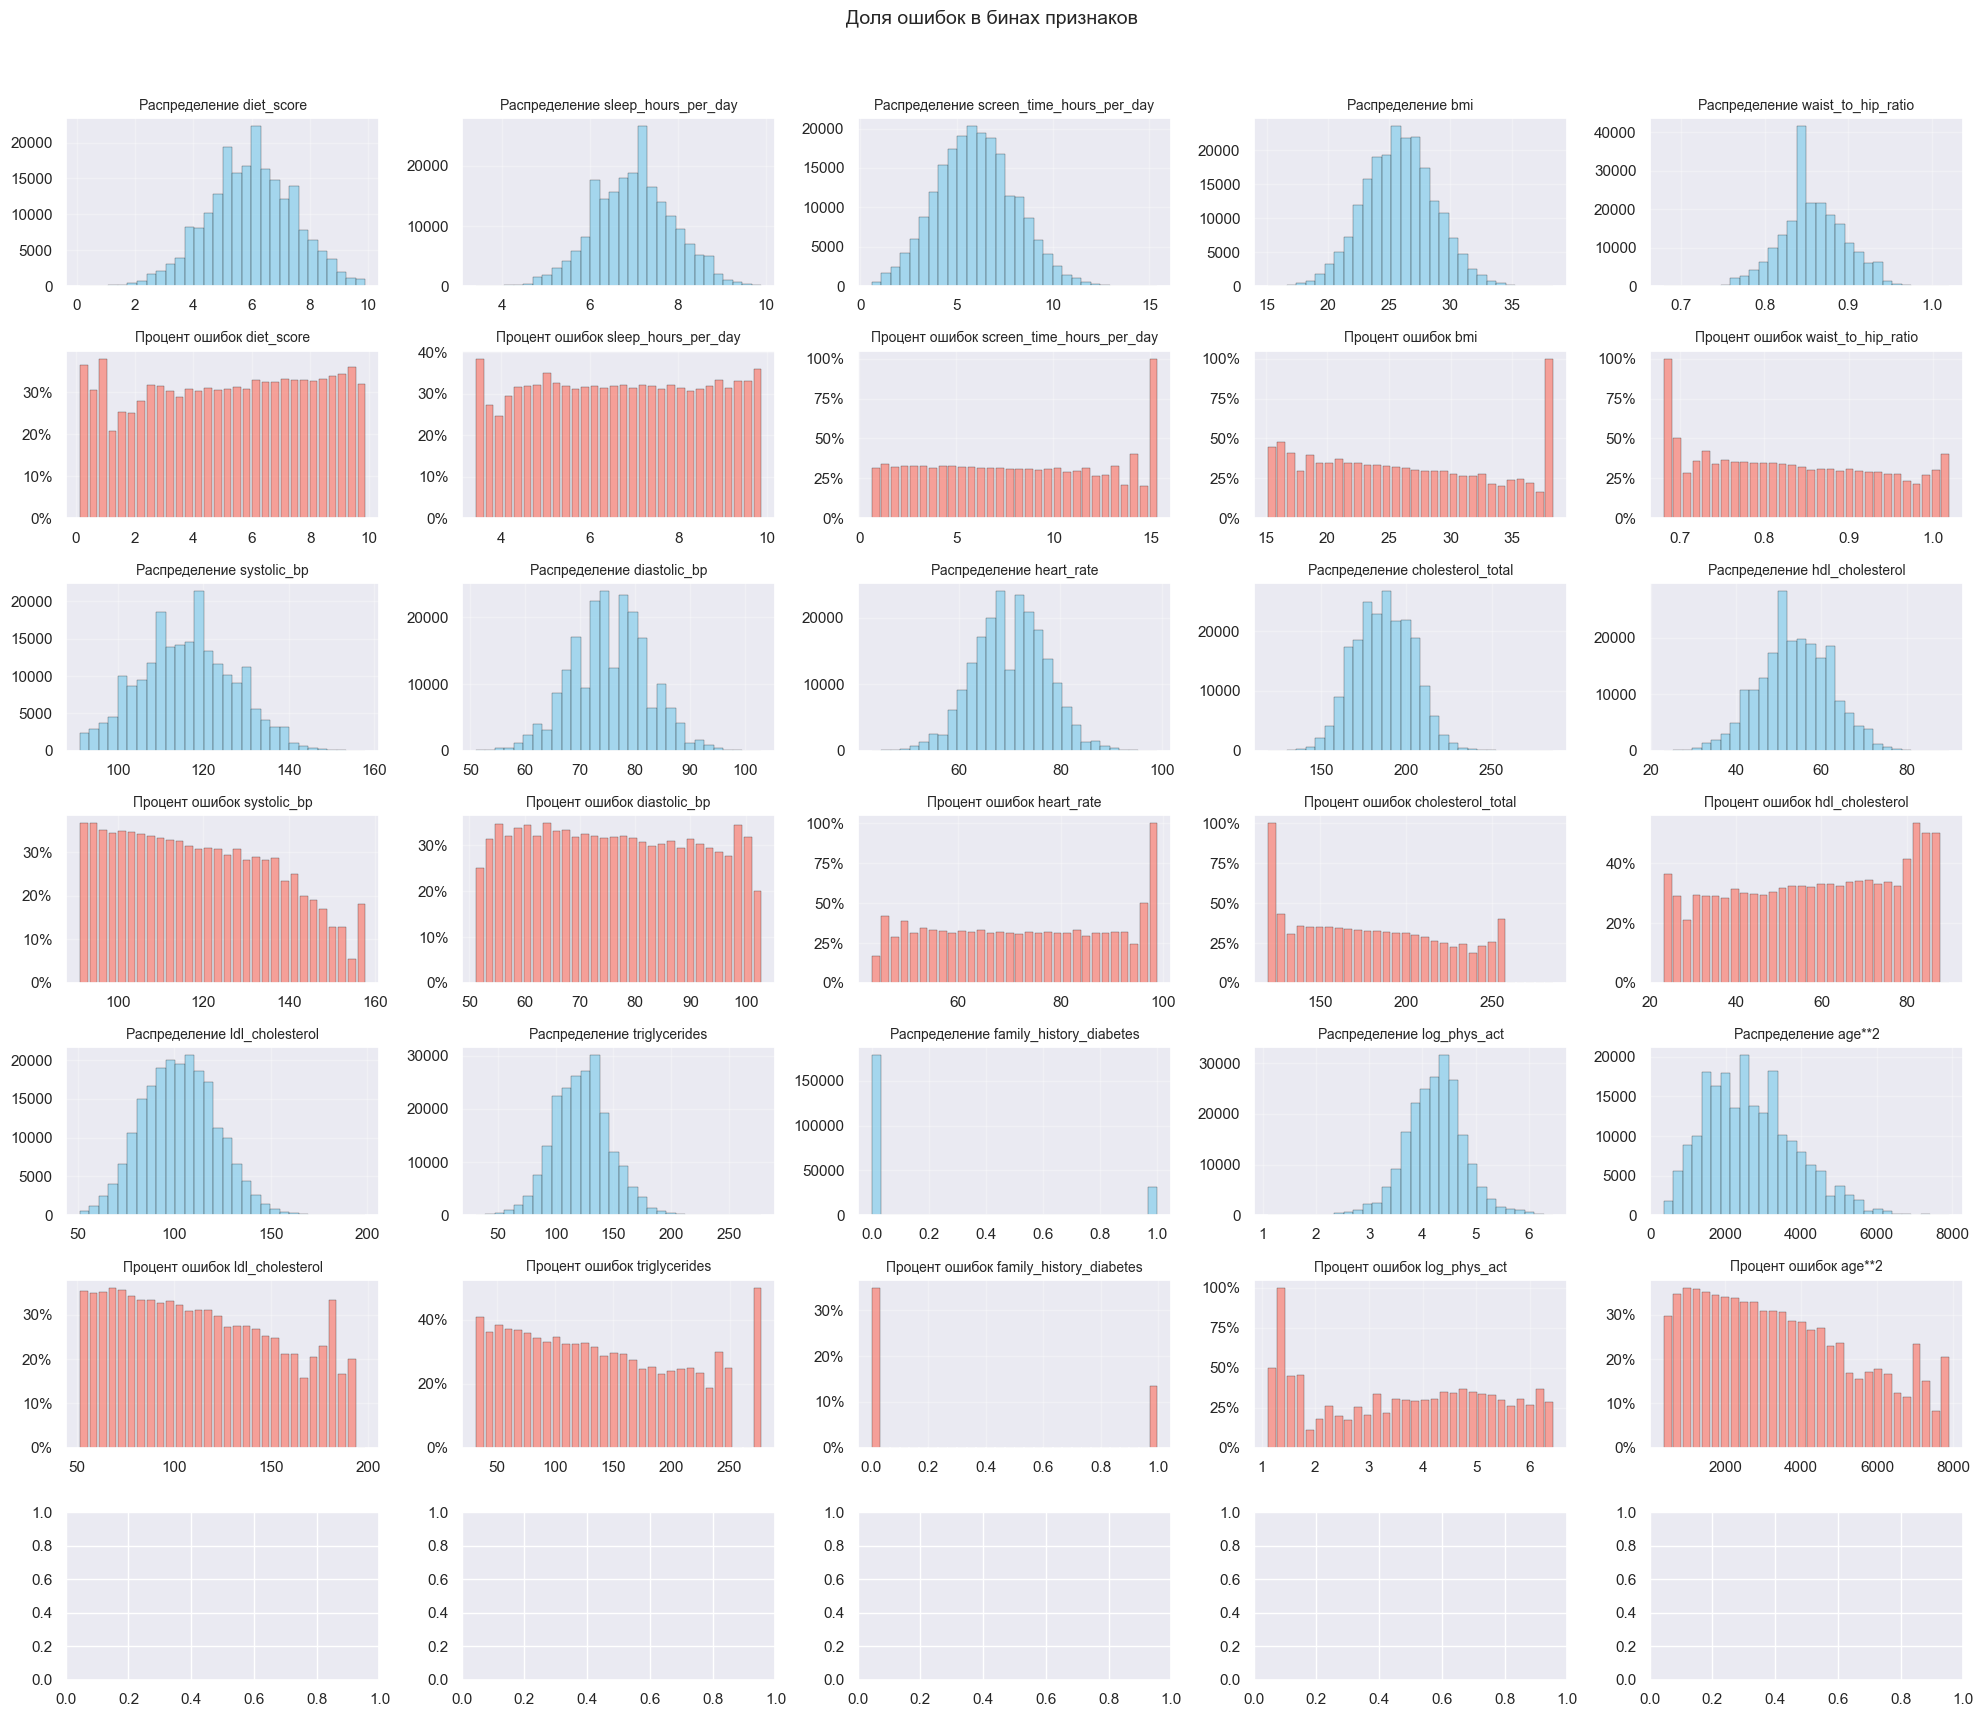

Категориальные колонки не найдены.


In [77]:
plot_error_rate_per_bin(
    df_errors=X_errors5,
    df_correct=X_true5,
    drop_cols= params5['ignored_features'] + ['true_target']  # добавь, что хочешь убрать
)
